# Explore here

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

# Planteamiento del problema y recolección de la data

* Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019
* El objetivo principal de este analisis estara enfocado en establecer en que vecindarios se presentan los mayores valores de los inmuebles.

In [2]:
# Lectura y guardado data
# URL del archivo CSV
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
df_mi=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [3]:
# Guardado de la data
df_mi = pd.read_csv(url)
df_mi_inicial = pd.read_csv(url)


# Ruta de destino
ruta_destino = '/workspaces/Proyecto-de-Regresi-n-Lineal/data/raw/medical_insurance_cost.csv'
ruta_destino_i = '/workspaces/Proyecto-de-Regresi-n-Lineal/data/raw/medical_insurance_cost_inicial.csv'

# Crear el directorio si no existe
os.makedirs(os.path.dirname(ruta_destino), exist_ok=True)

# Guardar el DataFrame en la ruta especificada con una copia de la data original
df_mi.to_csv(ruta_destino, index=False)
df_mi_inicial.to_csv(ruta_destino_i, index=False)

print(f'Archivo guardado en: {ruta_destino}')

Archivo guardado en: /workspaces/Proyecto-de-Regresi-n-Lineal/data/raw/medical_insurance_cost.csv


In [4]:
df_mi.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df_mi.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df_mi.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Exploración y limpieza de los Datos

In [8]:
# Valores Nulos
df_mi.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Eliminamos duplicados
dp=df_mi[df_mi.duplicated(keep=False)]
df_mi.drop_duplicates(inplace=True)

El Dataset esta conformado por 1337 valores, 7 variables, incluyendo la clase a predecir (charges), las predictoras estan conformadas por: age, sex, bmi, children, smoker, region. No tiene valores nulos, solo tiene un registro duplicado y procedemos a eliminarlo.


La distribucion de los tipos de variables es la siguiente:

* age int64
* sex object
* bmi float64
* children int64
* smoker object
* region object
* charges float64

Con el analisis inicial de variables del Dataset las variables region y children no tienen un peso importante en la clase a predecir y por tanto se procede a eliminarlas.

In [10]:
df_mi.drop(axis=1,columns=['region','children'],inplace=True)
df_mi.columns

Index(['age', 'sex', 'bmi', 'smoker', 'charges'], dtype='object')

# Análisis de variables

Variables univariante

In [11]:
df_mi.charges.describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [12]:
df_mi.charges.mode()

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1332    55135.40209
1333    58571.07448
1334    60021.39897
1335    62592.87309
1336    63770.42801
Name: charges, Length: 1337, dtype: float64

In [13]:
df_mi.age.describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [14]:
df_mi.bmi.describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [15]:
df_mi.bmi.mode()

0    32.3
Name: bmi, dtype: float64

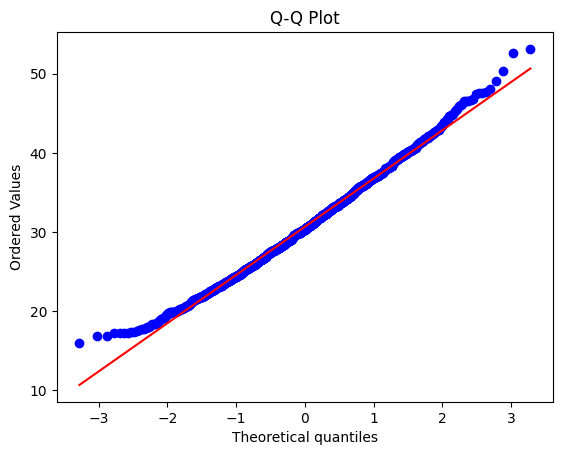

In [16]:
stats.probplot(df_mi.bmi, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

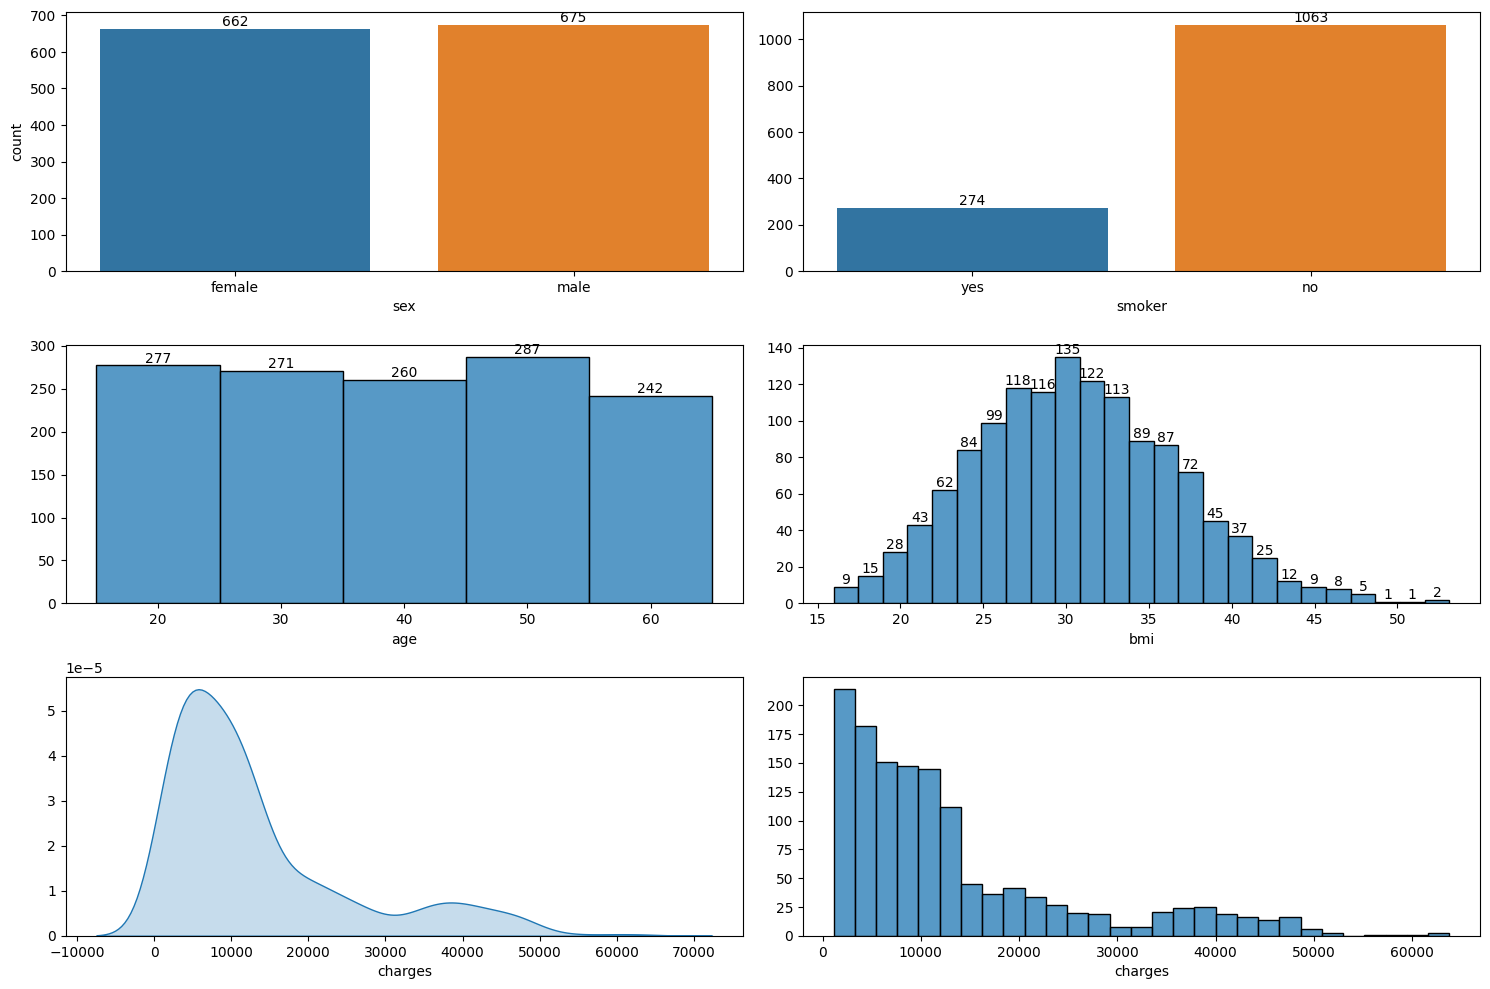

In [17]:
# Graficamos

fig, axis = plt.subplots(3,2, figsize = (15, 10))

# Crear un histograma múltiple
sns.countplot(ax = axis[0,0], data = df_mi, x = "sex", hue='sex')
axis[0,0].bar_label(axis[0,0].containers[0])
axis[0,0].bar_label(axis[0,0].containers[1])

sns.countplot(ax = axis[0,1], data = df_mi, x = "smoker", hue='smoker').set(ylabel = None)
axis[0,1].bar_label(axis[0,1].containers[0])
axis[0,1].bar_label(axis[0,1].containers[1])

sns.histplot(ax = axis[1,0], data = df_mi, x = "age", bins=(15,25,35,45,55,65)).set(ylabel = None)
axis[1,0].bar_label(axis[1,0].containers[0])
#axis[1,0].bar_label(axis[1,0].containers[1])

sns.histplot(ax = axis[1,1], data = df_mi, x = "bmi").set(ylabel = None)
axis[1,1].bar_label(axis[1,1].containers[0])

sns.kdeplot(ax = axis[2,0], data = df_mi.charges,fill=True).set(ylabel = None)
#axis[2,0].bar_label(axis[2,0].containers[0])

sns.histplot(ax = axis[2,1], data = df_mi, x='charges').set(ylabel = None)

plt.tight_layout()

plt.show()

El analisis de cada variable arrojó la siguiente información:

* sex: sex es una variable con las clases balanceadas (fem 662 valores y masc 675 valores).
* smoker: smoker tiene 20,5% en clase 'yes' y 79,5% en clase 'no'.
* age: El 75% de los valores de age estan entre 18 y 51 años, no se detectan valores atipicos.
* bmi: El indice de masa corporal tiene una media, moda y mediana muy parecidas alrededor 30, asumimos una distribucion normal.
* charges:Tiene un sesgo positivo (mediana < media), el 75% de los datos se ubican entre 1121.8 y 16657.7, sin embargo, se tienen valores con magnitudes superiores a los 60.000, se deben revisar valores atipicos.

Variables Multivariante

In [19]:
# Transformamos las variables age y bmi en rangos

df_mi['age_range']=pd.cut(df_mi['age'],bins=[0,20,30,40,50,60,70],
                labels=['18-20 a','20-30 a','30-40 a','40-50 a','50-60 a','60-70 a'],include_lowest=True)
df_mi['bmi_range']=pd.cut(df_mi['bmi'],bins=[0,20,30,40,50,60],
                labels=['15-20','20-30','30-40','40-50','50-60'],include_lowest=True)
df_mi.loc[df_mi.bmi>50]

,age,sex,bmi,smoker,charges,age_range,bmi_range
847,23,male,50.38,no,2438.0552,20-30 a,50-60
1047,22,male,52.58,yes,44501.3982,20-30 a,50-60
1317,18,male,53.13,no,1163.4627,18-20 a,50-60


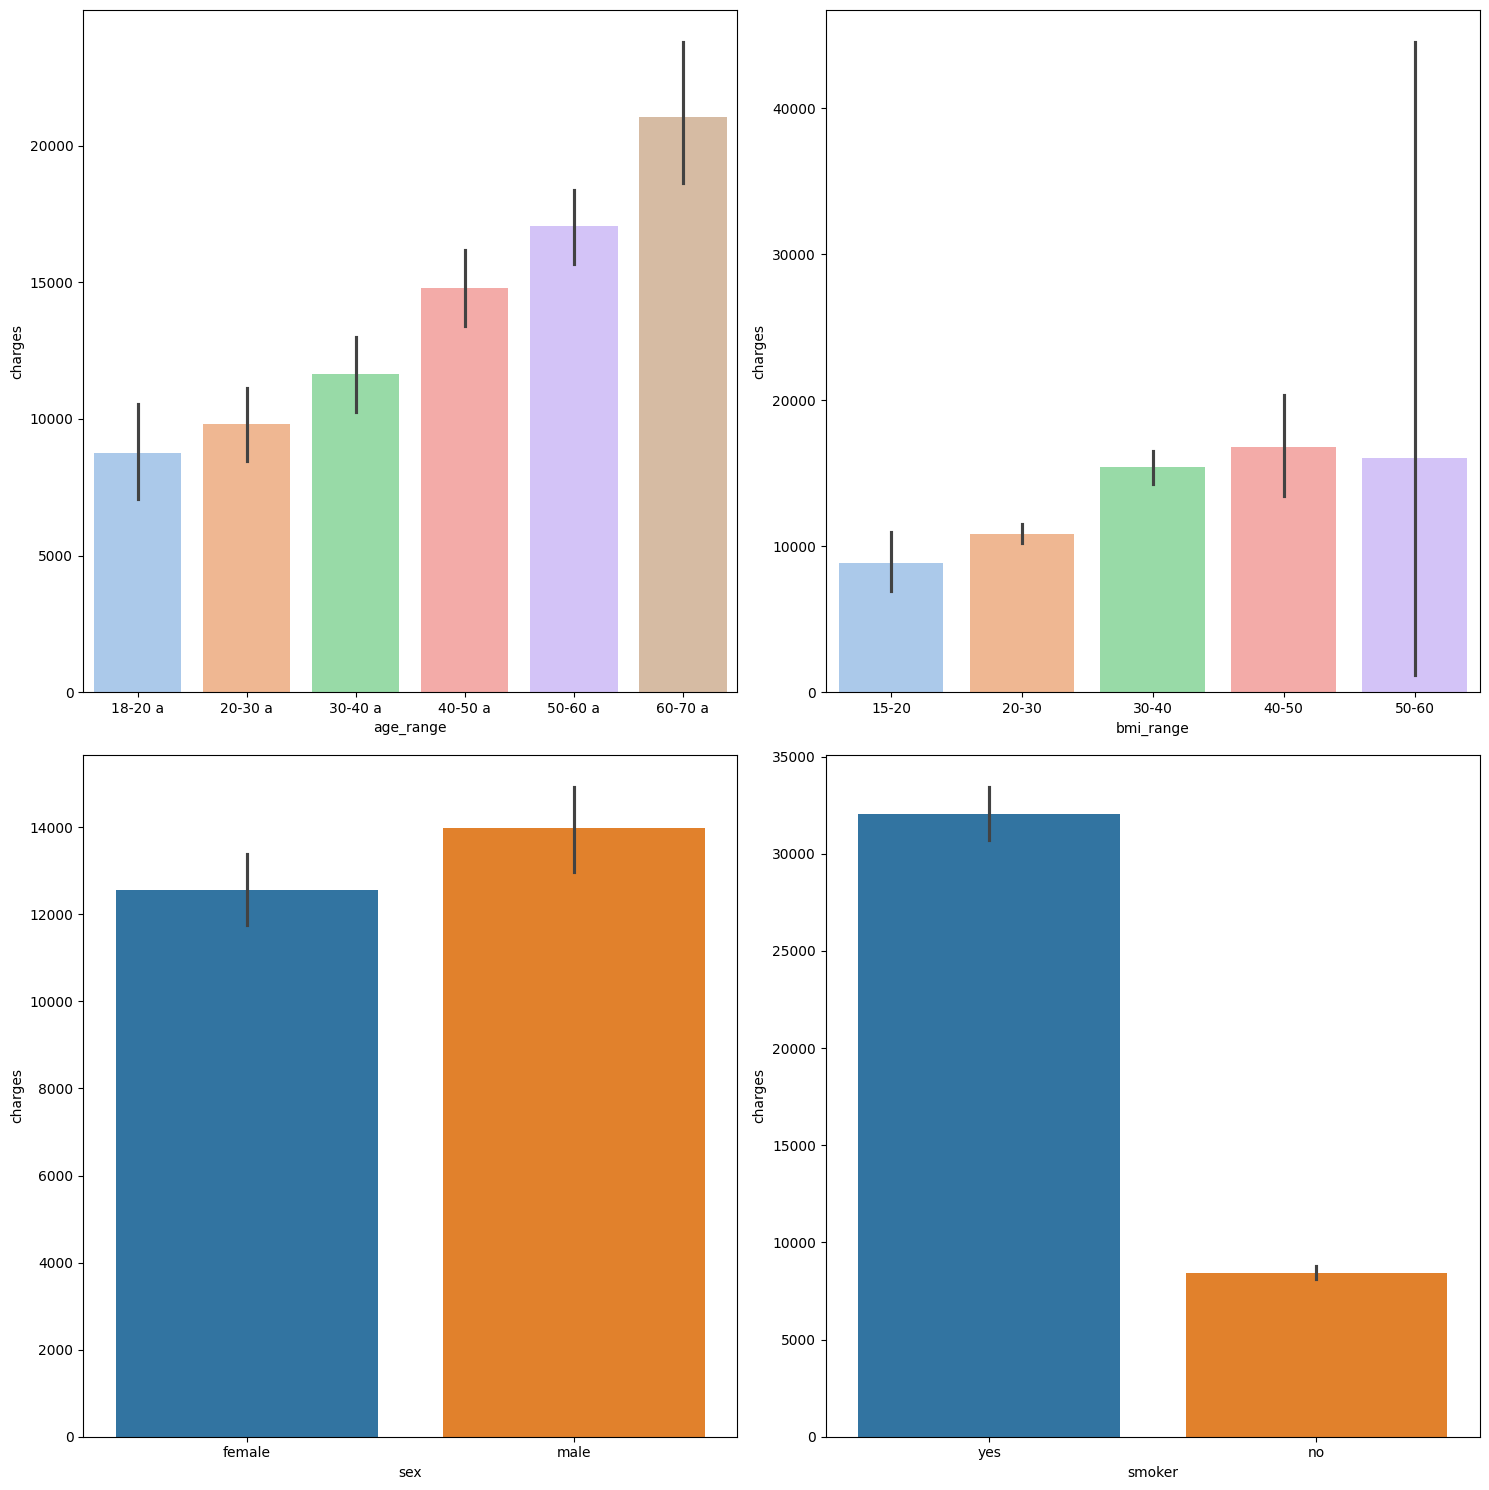

In [20]:
# Graficamos

fig, axis = plt.subplots(2,2, figsize = (15, 15))

sns.barplot(ax = axis[0, 0], data = df_mi, y ='charges',x='age_range', hue = 'age_range',palette='pastel')
sns.barplot(ax = axis[0, 1], data = df_mi, y = 'charges',x='bmi_range', hue = "bmi_range",palette='pastel')

sns.barplot(ax = axis[1, 0],data=df_mi,y='charges',x='sex', hue='sex' )
sns.barplot(ax = axis[1,1],data=df_mi,y = 'charges',x='smoker',hue='smoker' )

plt.tight_layout()
plt.show()

In [21]:
# Factorizamos para matriz de correlación

df_mi['sex_f']=pd.factorize(df_mi['sex'])[0]
df_mi['smoker_f']=pd.factorize(df_mi['smoker'])[0]
df_mi.columns

Index(['age', 'sex', 'bmi', 'smoker', 'charges', 'age_range', 'bmi_range',
       'sex_f', 'smoker_f'],
      dtype='object')

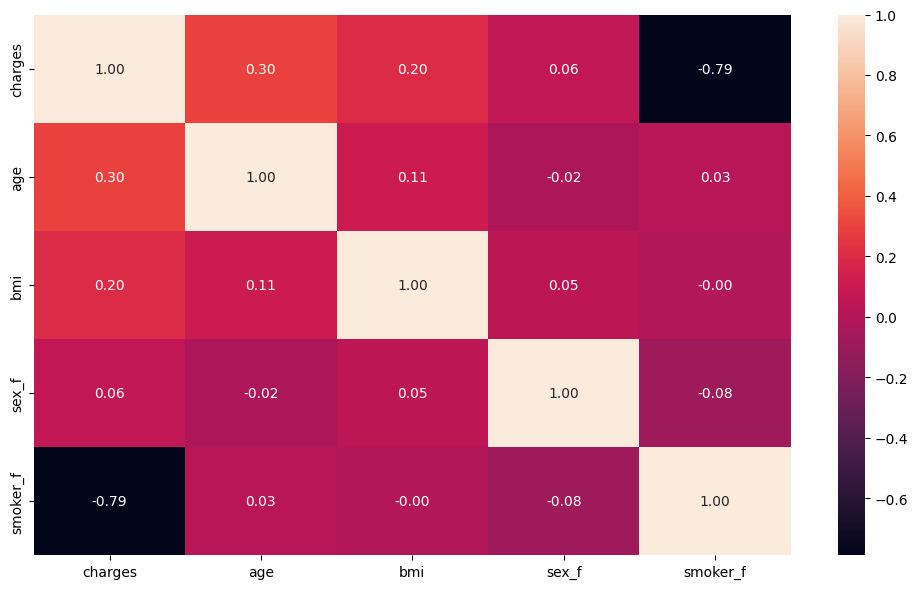

In [22]:
fig, axis = plt.subplots(figsize = (10, 6))
matriz_corr=df_mi[['charges','age','bmi','sex_f','smoker_f']].corr()

sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

El analisis de cada variable arrojó la siguiente información:

* La variable con mas relación con charges es smoker con una correlacion negativa de -0.79 medio alta. 
* Las otras variables, en orden de importancia son age y bmi con valores medios de 0.30 y 0.20, respectivamente. 
* La variable sexo muestra una correlacion baja de 0.06 con la clase a predecir.

# Ingeniería de Características

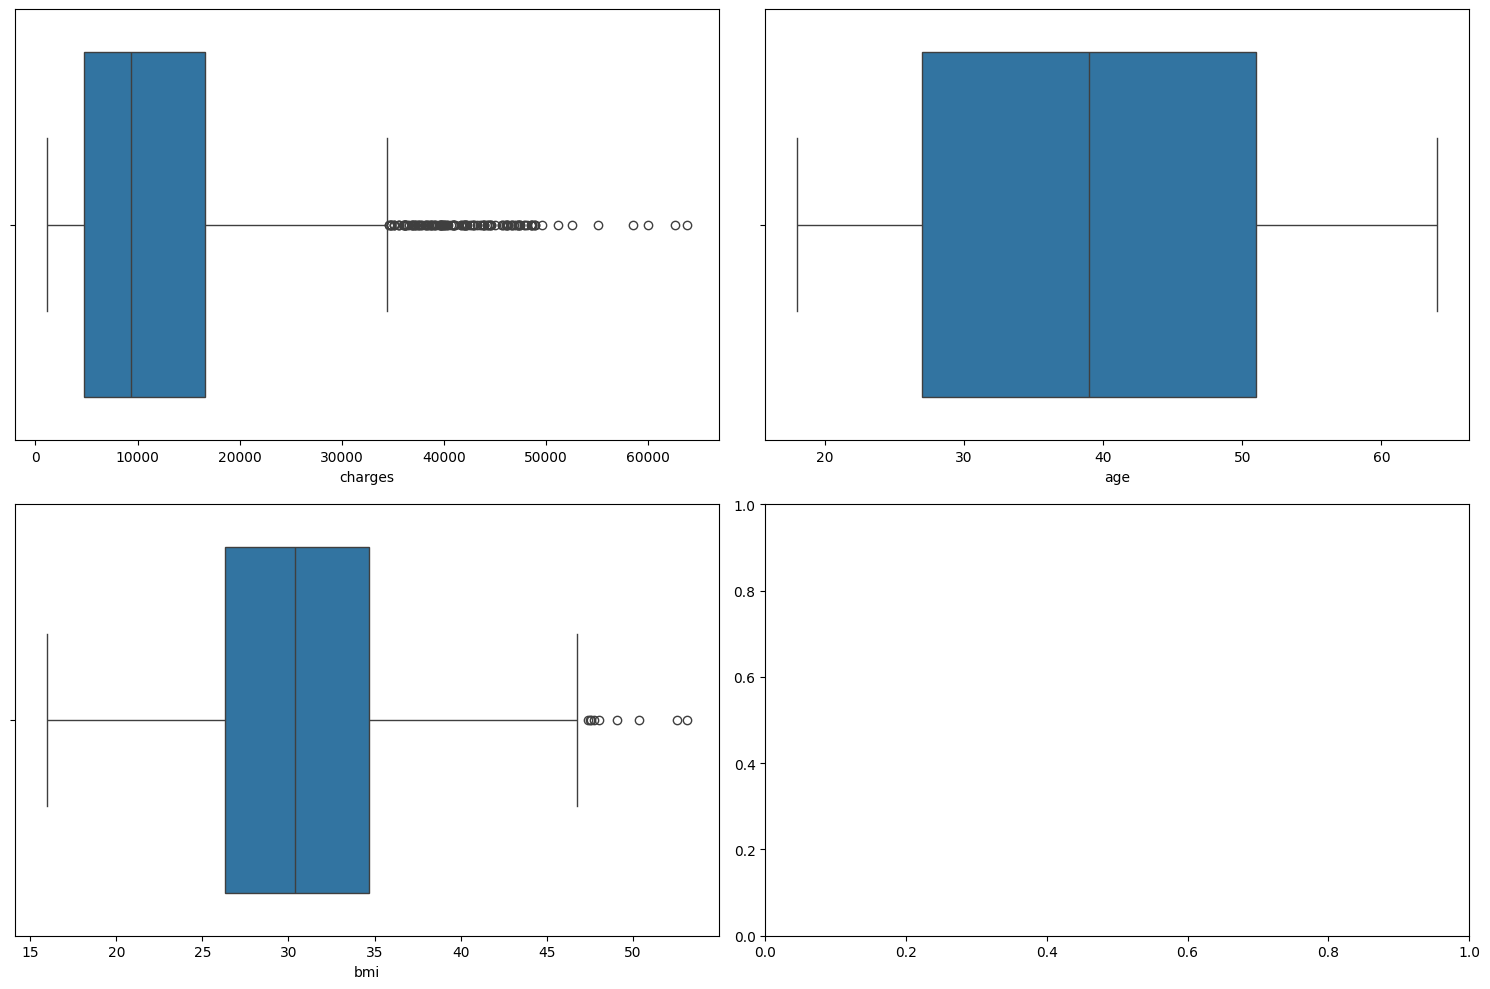

In [23]:
# Graficamos

fig, axis = plt.subplots(2,2, figsize = (15, 10))

# Crear un histograma múltiple
sns.boxplot(ax = axis[0,0], data = df_mi, x = "charges")
sns.boxplot(ax = axis[0,1], data = df_mi, x = "age")
sns.boxplot(ax = axis[1,0], data = df_mi, x = "bmi")

plt.tight_layout()
plt.show()

In [26]:
d_charges=df_mi['charges'].describe()
charges_iqr=d_charges['75%']-d_charges['25%']
p_lim_sup=d_charges['75%']+1.5*charges_iqr
p_lim_inf=d_charges['25%']-1.5*charges_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(charges_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 34524.78 y -13120.72, con un rango intercuartílico de 11911.37


In [27]:
d_bmi=df_mi['bmi'].describe()
bmi_iqr=d_bmi['75%']-d_bmi['25%']
p_lim_sup=d_bmi['75%']+1.5*bmi_iqr
p_lim_inf=d_bmi['25%']-1.5*bmi_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(bmi_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 47.32 y 13.67, con un rango intercuartílico de 8.41


La variable charges tiene como limite superior un valor de 34524.78, con este parametro se deberian eliminar 132 datos, de estos 129 pertenecen a personas que son fumadores y debido a la relacion que existe entre las variables charges y smoker no se eliminaran valores de la variable charges.

Para bmi no se eliminaran datos.

# Creación del Modelo de Regresión Lineal

In [25]:
from sklearn.model_selection import train_test_split

num_var = ['age','bmi','smoker_f']

# Dividimos el conjunto de datos en muestras de train y test
X = df_mi.drop("charges", axis = 1)[num_var]
y = df_mi["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,bmi,smoker_f
1114,23,24.510,1
968,21,25.745,1
599,52,37.525,1
170,63,41.470,1
275,47,26.600,1


In [28]:
# Escalado de Train y Test

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_var)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_var)

X_train_scal.head()

,age,bmi,smoker_f
1114,0.108696,0.230024,1.0
968,0.065217,0.263250,1.0
599,0.739130,0.580172,1.0
170,0.978261,0.686306,1.0
275,0.630435,0.286252,1.0


In [30]:
# Entrenamiento del modelo

model = LinearRegression()
model.fit(X_train_scal, y_train)

print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2, b3): {model.coef_}")

Intercepto (a): 21701.79391257018
Coeficientes (b1, b2, b3): [ 11586.30415359  11329.51105637 -23074.26173498]


In [31]:
# Predicción del Modelo

y_pred = model.predict(X_test_scal)
y_pred

array([ 8433.67443577,  4336.46678013, 13165.0382606 , 30593.69534864,
        8738.64384303, 13004.1887831 , 29273.63576136,  2177.09021482,
       10922.95093736, 10315.83022735, 11021.84491859, 33740.33309282,
       30613.92158231, 18004.87150727,  9656.23179762,  9311.37354392,
        4325.12010919, 32099.96630635,  3001.71338943,  5552.62898392,
        4325.12010919, 29913.00795743, 14580.01800456, 30752.45719245,
       31444.92261851,  4769.02189756, 35187.05259131, 37413.46842278,
       10952.8675722 , 12177.75978526,  6505.9651105 , 13121.95183512,
         870.87899962, 12471.87695664, 40355.37672202, 12499.04467281,
        2732.11267963,  2866.20850841, 32023.18474965,  9365.1280589 ,
        6903.0538664 , 29243.81679061, 34097.79751626, 11919.91981386,
        6896.22734444,  4145.55111435,  6040.33037213,  9173.38425823,
        4186.69945959,  8909.59778913,  6340.1295272 , 12053.6361681 ,
       30836.41015271,  4425.70495311, 10719.84316929,  9666.05445578,
      

In [32]:
# 
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 35841574.81814754
Coeficiente de determinación: 0.8049502474643171


In [34]:
# Guardado de la Data Procesada
X_train_scal.to_csv('/workspaces/Proyecto-de-Regresi-n-Lineal/data/processed/X_train.csv')
X_test_scal.to_csv('/workspaces/Proyecto-de-Regresi-n-Lineal/data/processed/X_test.csv')
y_train.to_csv('/workspaces/Proyecto-de-Regresi-n-Lineal/data/processed/y_train.csv')
y_test.to_csv('/workspaces/Proyecto-de-Regresi-n-Lineal/data/processed/y_test.csv')              
